In [ ]:
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from IPython.display import display, HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IV127 = Path('/content/drive/My Drive/IV127')

In [ ]:
def visualize(filename, level='-', problems_analysis=True, topic_analysis=True, graph = True):
    df = pd.read_csv(filename)
    df['level'] = df['fullname'].str.extract(pat=r'-(\d)-*')
    df['topic'] = df['fullname'].str.replace('-\d-*', '').str.replace('uroven', '')
    if level != '-':
        df = df[df.level.astype(int) == int(level)]

    df['is_correct'] = df['pred'] == df['solutions']
    df['is_correct_problem'] = df['is_correct']
    problems = df.groupby('problem').agg({'fullname': 'first', 
                                    'is_correct': list, 
                                    'is_correct_problem': all, 
                                    'sentence': list, 
                                    'solutions': list, 
                                    'pred': list})
    
    topics = problems.groupby('fullname').agg({'is_correct': list, 'is_correct_problem': list})
    
    topics['topic_accuracy'] = topics.apply(lambda row: sum(row['is_correct_problem']) / len(row['is_correct_problem']), axis=1)
    independent_acc = df['is_correct'].sum() / len(df['is_correct']) *100
    complete_acc = problems['is_correct_problem'].sum() / len(problems) *100
    display(HTML(f'<h2>{filename.stem}: Independent accuracy: {independent_acc:0.2f}%. Complete acc: {complete_acc:0.2f}% </h2>'))

    if graph:
        fig, ax = plt.subplots(figsize=(15,8))
        plt.xlim(0,1)
        sns.barplot(x=topics.topic_accuracy, y=topics.index)
        ax.set_ylabel("Topics")
        ax2 = ax.twinx()
        ax2.set_yticks(topics['is_correct_problem'].apply(len))
        ax2.yaxis.set_tick_params(which='both')
        ax2.set_ylabel("Number of exercises for topics")
        plt.show()

    if topic_analysis:
        top3 = topics.nlargest(3, ['topic_accuracy'])['topic_accuracy']
        top3_html = "".join([f"<li>Topic: {name}\t Accuracy: {acc}</li>" for name, acc in zip(top3.index, top3.tolist())])
        display(HTML("<h2>The top 3 topics:</h2><ul>" + top3_html + "</ul>"))
        print(f"TOP3: {','.join(list(top3.index))}")
            
        worst3 = topics.nsmallest(3, ['topic_accuracy'])['topic_accuracy']
        worst3_html = "".join([f"<li>Topic: {name}\t Accuracy: {acc}</li>" for name, acc in zip(worst3.index, worst3.tolist())])
        display(HTML("<h2>The worst 3 topics:</h2><ul>" + worst3_html + "</ul>"))
        print(f"WORST3: {','.join(list(worst3.index))}")

    if problems_analysis:
        problems['problem_accuracy'] = problems['is_correct'].apply(sum) / problems['is_correct'].apply(len)
        display(HTML("<h2>The problems with the highest accuracy</h2>"))
        top5_problems = problems.nlargest(5, ['problem_accuracy'])[['problem_accuracy', 'fullname', 'sentence', 'solutions', 'pred']]
        display(HTML(top5_problems.to_html()))

        display(HTML("<h2>The problems with the lowest accuracy</h2>"))
        worst5_problems = problems.nsmallest(5, ['problem_accuracy'])[['problem_accuracy', 'fullname', 'sentence', 'solutions', 'pred']]
        display(HTML(worst5_problems.to_html()))

In [ ]:
filenames = [f for f in IV127.iterdir() if f.suffix == '.csv']

In [ ]:
filenames

[PosixPath('/content/drive/My Drive/IV127/gpt2-bijection.csv'),
 PosixPath('/content/drive/My Drive/IV127/gpt2.csv'),
 PosixPath('/content/drive/My Drive/IV127/random.csv'),
 PosixPath('/content/drive/My Drive/IV127/random_bijection.csv'),
 PosixPath('/content/drive/My Drive/IV127/word2vec.csv'),
 PosixPath('/content/drive/My Drive/IV127/word2vec_bijection.csv'),
 PosixPath('/content/drive/My Drive/IV127/distilbert-base-uncased.csv'),
 PosixPath('/content/drive/My Drive/IV127/distilbert-base-uncased_bijection.csv'),
 PosixPath('/content/drive/My Drive/IV127/bert-base-uncased.csv'),
 PosixPath('/content/drive/My Drive/IV127/bert-base-uncased_bijection.csv'),
 PosixPath('/content/drive/My Drive/IV127/bert-large-uncased.csv'),
 PosixPath('/content/drive/My Drive/IV127/bert-large-uncased_bijection.csv'),
 PosixPath('/content/drive/My Drive/IV127/bart-large.csv'),
 PosixPath('/content/drive/My Drive/IV127/bart-large_bijection.csv'),
 PosixPath('/content/drive/My Drive/IV127/roberta-base.csv

In [ ]:
random = Path('/content/drive/My Drive/IV127/random_bijection.csv')
word2vec = Path('/content/drive/My Drive/IV127/word2vec_bijection.csv')
distilbert = Path('/content/drive/My Drive/IV127/distilbert-base-uncased_bijection.csv')
bert = Path('/content/drive/My Drive/IV127/bert-base-uncased_bijection.csv')
bertlarge = Path('/content/drive/My Drive/IV127/bert-large-uncased_bijection.csv')
roberta = Path('/content/drive/My Drive/IV127/roberta-base_bijection.csv')
roberta_large = Path('/content/drive/My Drive/IV127/roberta-large_bijection.csv')
longformer = Path('/content/drive/My Drive/IV127/longformer-base-4096-bijection.csv')
gpt2 = Path('/content/drive/My Drive/IV127/gpt2-bijection.csv')
bart = Path('/content/drive/My Drive/IV127/bart-large_bijection.csv')

## Word2Vec visualization

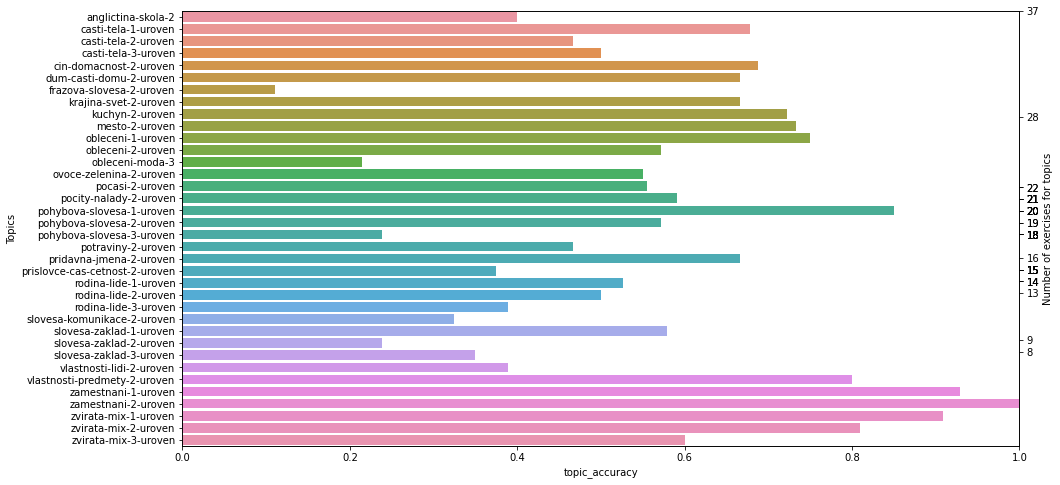

TOP3: zamestnani-2-uroven,zamestnani-1-uroven,zvirata-mix-1-uroven


WORST3: frazova-slovesa-2-uroven,obleceni-moda-3,pohybova-slovesa-3-uroven


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
14,1.0,dum-casti-domu-2-uroven,"[Look at yourself in the _ ., I live on the first _ ., The teacher sat on the _ ., He always sings in the _ .]","[mirror, floor, chair, shower]","[mirror, floor, chair, shower]"
15,1.0,dum-casti-domu-2-uroven,"[Mary jumped into the _ ., Jane sleeps in the _ ., The _ is too hard for sleeping., The _ is hanging from the ceiling.]","[pool, bedroom, pillow, lamp]","[pool, bedroom, pillow, lamp]"
18,1.0,rodina-lide-2-uroven,"[My younger _ watches TV., What is your _ ?, Our _ cannot talk yet., She visited her aunt and _ .]","[brother, age, baby, uncle]","[brother, age, baby, uncle]"
21,1.0,rodina-lide-2-uroven,"[My older _ is a teacher., Many _ were there., Write your _ ., He is a childhood _ .]","[brother, people, name, friend]","[brother, people, name, friend]"
28,1.0,slovesa-zaklad-1-uroven,"[Will you _ the door, please?, Can I _ you a question?, She will _ the pizza., Do you want to _ a picture for me?, We will _ to Africa.]","[open, ask, eat, paint, travel]","[open, ask, eat, paint, travel]"


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
46,0.0,pridavna-jmena-2-uroven,"[Iron is more _ than gold., Are my socks _ already?, My fingertips are _ ., The day was _ .]","[useful, dry, frozen, hot]","[frozen, hot, useful, dry]"
76,0.0,slovesa-komunikace-2-uroven,"[How do you _ that in German?, You should _ the weather before you go out., I _ your help., He doesn't have a job. He needs to _ for money.]","[say, check, appreciate, beg]","[beg, say, check, appreciate]"
84,0.0,frazova-slovesa-2-uroven,"[We need to _ the costs., I will _ the problem., You can not _ to the pressure., She wants to _ .]","[cut down, look into, give in, go away]","[give in, go away, cut down, look into]"
180,0.0,rodina-lide-2-uroven,"[Ema had a _ on 24 July., What _ is your sister?, The sister of my mother is my _ .]","[baby, age, aunt]","[age, aunt, baby]"
187,0.0,rodina-lide-1-uroven,"[I come from a large family - I have four _ and a sister., We invited 15 _ to our family dinner., My _ is in her seventies.]","[brothers, people, grandmother]","[grandmother, brothers, people]"


In [ ]:
visualize(word2vec)

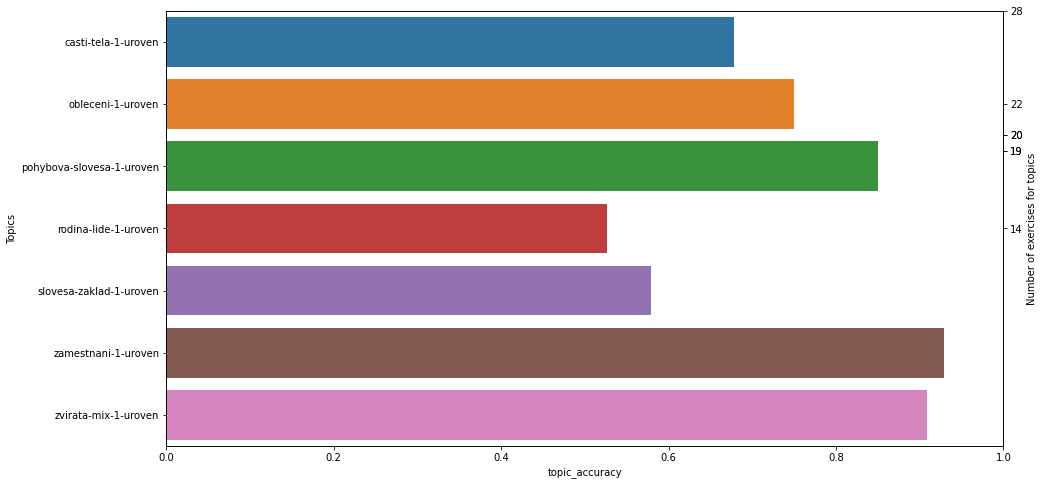

TOP3: zamestnani-1-uroven,zvirata-mix-1-uroven,pohybova-slovesa-1-uroven


WORST3: rodina-lide-1-uroven,slovesa-zaklad-1-uroven,casti-tela-1-uroven


In [ ]:
visualize(word2vec, level=1, problems_analysis=False)

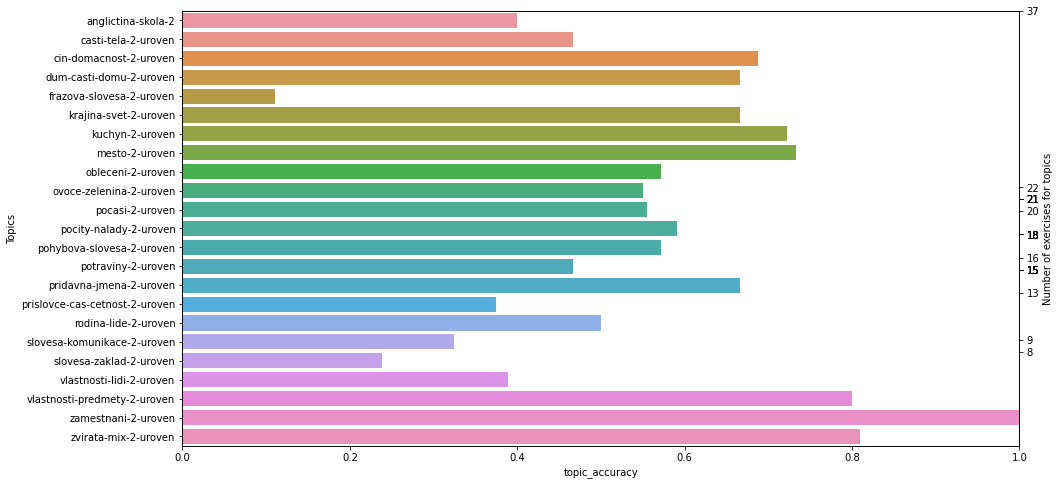

TOP3: zamestnani-2-uroven,zvirata-mix-2-uroven,vlastnosti-predmety-2-uroven


WORST3: frazova-slovesa-2-uroven,slovesa-zaklad-2-uroven,slovesa-komunikace-2-uroven


In [ ]:
visualize(word2vec, level=2, problems_analysis=False)

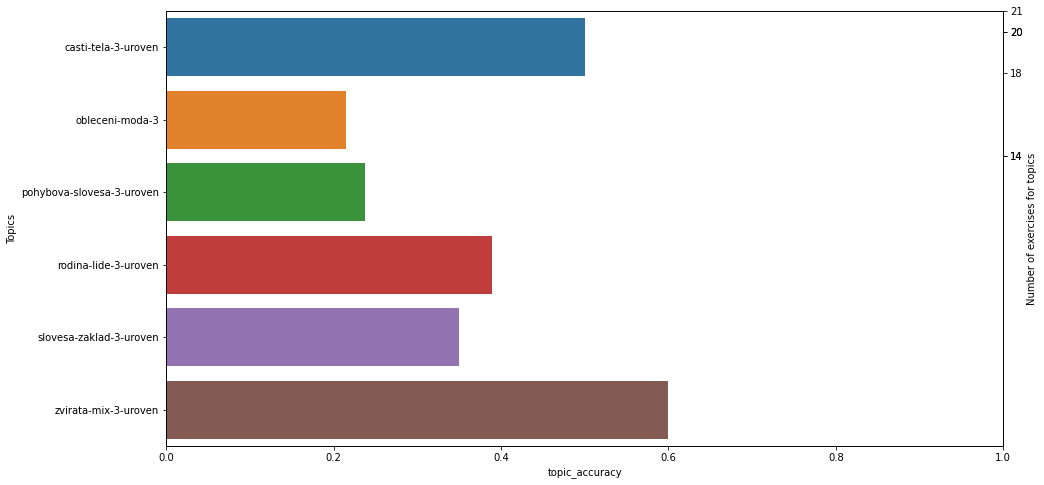

TOP3: zvirata-mix-3-uroven,casti-tela-3-uroven,rodina-lide-3-uroven


WORST3: obleceni-moda-3,pohybova-slovesa-3-uroven,slovesa-zaklad-3-uroven


In [ ]:
visualize(word2vec, level=3, problems_analysis=False)

## RoBERTa large

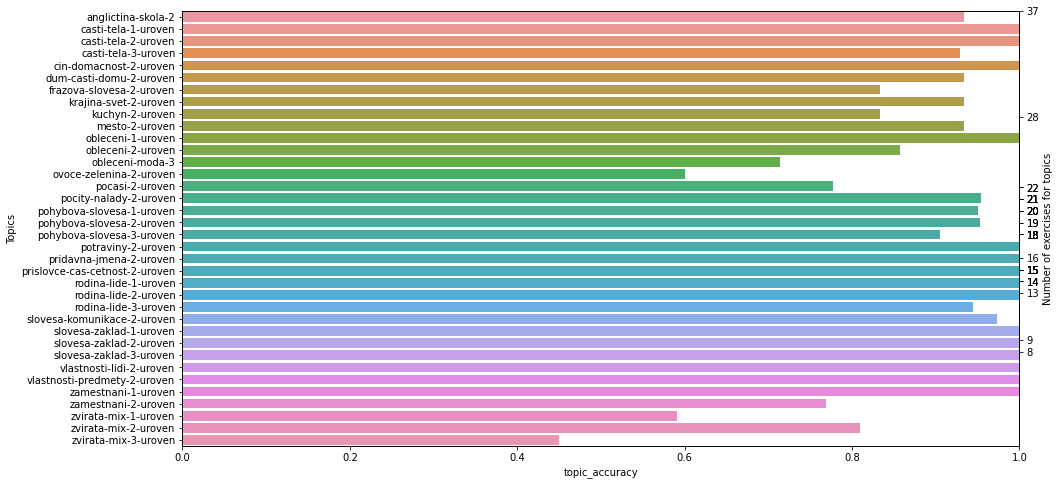

TOP3: casti-tela-1-uroven,casti-tela-2-uroven,cin-domacnost-2-uroven


WORST3: zvirata-mix-3-uroven,zvirata-mix-1-uroven,ovoce-zelenina-2-uroven


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
13,1.0,dum-casti-domu-2-uroven,"[The _ is at the end of the hall., Tom is in the _ , cutting up some vegetables., He grows tomatoes in the _ ., The dog is sitting on the _ .]","[bathroom, kitchen, garden, carpet]","[bathroom, kitchen, garden, carpet]"
14,1.0,dum-casti-domu-2-uroven,"[Look at yourself in the _ ., I live on the first _ ., The teacher sat on the _ ., He always sings in the _ .]","[mirror, floor, chair, shower]","[mirror, floor, chair, shower]"
15,1.0,dum-casti-domu-2-uroven,"[Mary jumped into the _ ., Jane sleeps in the _ ., The _ is too hard for sleeping., The _ is hanging from the ceiling.]","[pool, bedroom, pillow, lamp]","[pool, bedroom, pillow, lamp]"
16,1.0,dum-casti-domu-2-uroven,"[He was so tired that he fell asleep in the _ ., Close the _ , please., I lost my _ ., He changed his _ ., Tom is building a _ .]","[armchair, door, key, address, wall]","[armchair, door, key, address, wall]"
17,1.0,rodina-lide-2-uroven,"[The _ wakes up his wife., My _ has three children., The _ is learning quickly.]","[husband, aunt, child]","[husband, aunt, child]"


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
281,0.00,zvirata-mix-2-uroven,"[The _ has brown fur., The _ has large ears., The _ is black and very strong.]","[camel, donkey, gorilla]","[donkey, gorilla, camel]"
312,0.00,ovoce-zelenina-2-uroven,"[A _ grows under the earth., A _ is similar to orange., A _ is yellow and sour., A _ can be found in many Czech recipes.]","[beetroot, grapefruit, lemon, cabbage]","[cabbage, beetroot, grapefruit, lemon]"
484,0.00,zvirata-mix-1-uroven,"[Look! There are _ jumping in the garden., Do you know that _ produce milk?, Most _ live in Australia.]","[rabbits, cows, kangaroos]","[kangaroos, rabbits, cows]"
144,0.25,kuchyn-2-uroven,"[Can you dry the dishes with a _ ?, We ate with _ in the Vietnamese restaurant., We can put some cheese in the pasta. Where is the cheese _ ?, Could you put these bananas in the fruit _ ?]","[tea towel, chopsticks, grater, bowl]","[tea towel, bowl, chopsticks, grater]"
179,0.25,pocity-nalady-2-uroven,"[I feel _ . There is nothing I can do., Martin's mum was _ that he failed the test., He lost his _ to live after his dog died., She has always _ politicians.]","[helpless, disappointed, will, mistrusted]","[mistrusted, helpless, will, disappointed]"


In [ ]:
visualize(roberta_large)

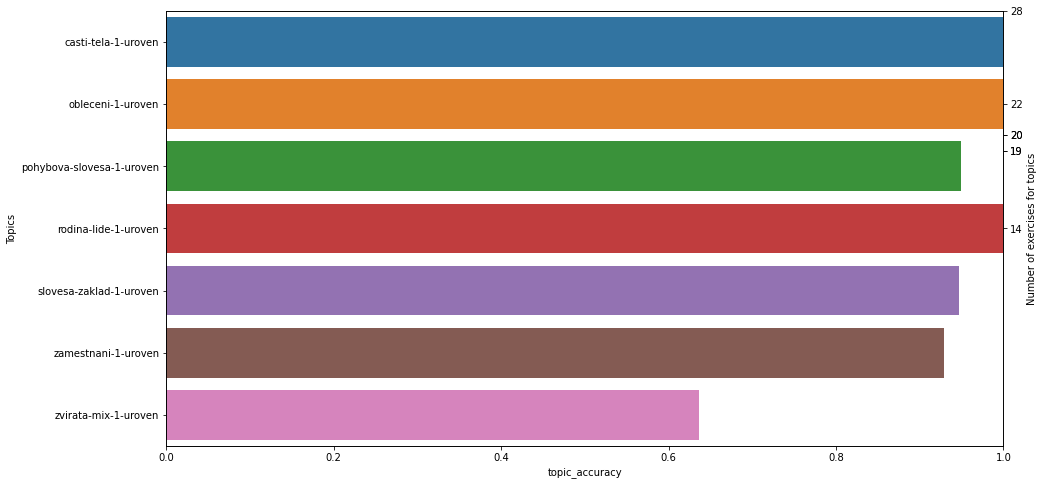

,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
23,1.0,slovesa-zaklad-1-uroven,"[Can I _ in this bed? , I would like to _ mineral water., I like to _ fantasy books., Please, can you _ the window?]","[sleep, drink, read, close]","[sleep, drink, read, close]"
28,1.0,slovesa-zaklad-1-uroven,"[Will you _ the door, please?, Can I _ you a question?, She will _ the pizza., Do you want to _ a picture for me?, We will _ to Africa.]","[open, ask, eat, paint, travel]","[open, ask, eat, paint, travel]"
94,1.0,zvirata-mix-1-uroven,"[You can give the carrot to the _ ., There is a _ on the pond., The milk comes from this _ ., It’s better to use _ for work than for riding. ]","[rabbit, duck, cow, donkey]","[rabbit, duck, cow, donkey]"
181,1.0,rodina-lide-1-uroven,"[How many _ do you have?, What is your _ ?, I'm Ivo's _ . We got married last summer.]","[children, name, wife]","[children, name, wife]"
182,1.0,rodina-lide-1-uroven,"[Klára and Anička are _ ., The brother of my mother is my _ ., I'm going to meet my boyfriend's _ at the weekend.]","[sisters, uncle, parents]","[sisters, uncle, parents]"


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
279,0.000000,zvirata-mix-1-uroven,"[The _ lives in Australia., The _ climbs the trees., The _ is man’s best friend.]","[kangaroo, monkey, dog]","[monkey, dog, kangaroo]"
213,0.333333,zvirata-mix-1-uroven,"[The _ produces milk., The _ is green., The _ is a type of bird.]","[cow, crocodile, chicken]","[cow, chicken, crocodile]"
215,0.333333,zvirata-mix-1-uroven,"[The _ is a very large grey animal., The _ is a bird that lives by water., The _ is an animal with four legs.]","[elephant, duck, dog]","[dog, duck, elephant]"
218,0.333333,zvirata-mix-1-uroven,"[The _ catches mice., The _ is a large animal with thick grey skin., The _ moves by jumping.]","[cat, hippopotamus, kangaroo]","[kangaroo, hippopotamus, cat]"
278,0.333333,zvirata-mix-1-uroven,"[The _ likes cold weather., The _ lives long and is very smart., This _ has very soft wool.]","[penguin, elephant, sheep]","[elephant, penguin, sheep]"


In [ ]:
visualize(roberta, level=1)

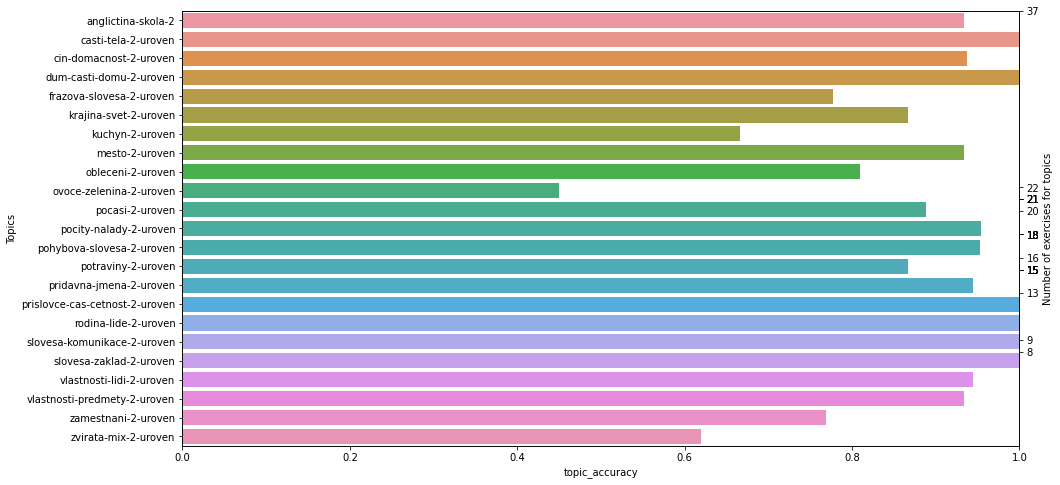

,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
13,1.0,dum-casti-domu-2-uroven,"[The _ is at the end of the hall., Tom is in the _ , cutting up some vegetables., He grows tomatoes in the _ ., The dog is sitting on the _ .]","[bathroom, kitchen, garden, carpet]","[bathroom, kitchen, garden, carpet]"
14,1.0,dum-casti-domu-2-uroven,"[Look at yourself in the _ ., I live on the first _ ., The teacher sat on the _ ., He always sings in the _ .]","[mirror, floor, chair, shower]","[mirror, floor, chair, shower]"
15,1.0,dum-casti-domu-2-uroven,"[Mary jumped into the _ ., Jane sleeps in the _ ., The _ is too hard for sleeping., The _ is hanging from the ceiling.]","[pool, bedroom, pillow, lamp]","[pool, bedroom, pillow, lamp]"
16,1.0,dum-casti-domu-2-uroven,"[He was so tired that he fell asleep in the _ ., Close the _ , please., I lost my _ ., He changed his _ ., Tom is building a _ .]","[armchair, door, key, address, wall]","[armchair, door, key, address, wall]"
17,1.0,rodina-lide-2-uroven,"[The _ wakes up his wife., My _ has three children., The _ is learning quickly.]","[husband, aunt, child]","[husband, aunt, child]"


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
117,0.00,cin-domacnost-2-uroven,"[You can _ the drinks in the fridge., Do you want to _ this picture?, You should _ it before using., I will have to _ my own paint.]","[cool, colour, shake, mix]","[mix, shake, cool, colour]"
281,0.00,zvirata-mix-2-uroven,"[The _ has brown fur., The _ has large ears., The _ is black and very strong.]","[camel, donkey, gorilla]","[donkey, gorilla, camel]"
442,0.00,ovoce-zelenina-2-uroven,"[We will have a barbecue on Saturday, we will make some meat, but also some vegetables, like _ ., We will have salad for dinner, there is some lettuce, cucumber and tomatoes, so I will just add some _ and it will be ready., A _ is a round fruit with a lot of seeds.]","[zucchini, pepper, pomegranate]","[pomegranate, zucchini, pepper]"
388,0.25,potraviny-2-uroven,"[My favourite _ flavour is chocolate., You can have an _ for breakfast., We can have _ together in the evening., I can’t eat _ , it’s made from milk.]","[ice cream, omelette, supper, butter]","[butter, ice cream, supper, omelette]"
390,0.25,potraviny-2-uroven,"[Is that _ from strawberries or peaches?, This _ is sweet and very juicy., He’s a vegetarian, he doesn’t eat _ ., I’ll have a bottle of _ .]","[jam, melon, meat, cola]","[meat, melon, cola, jam]"


In [ ]:
visualize(roberta, level=2)

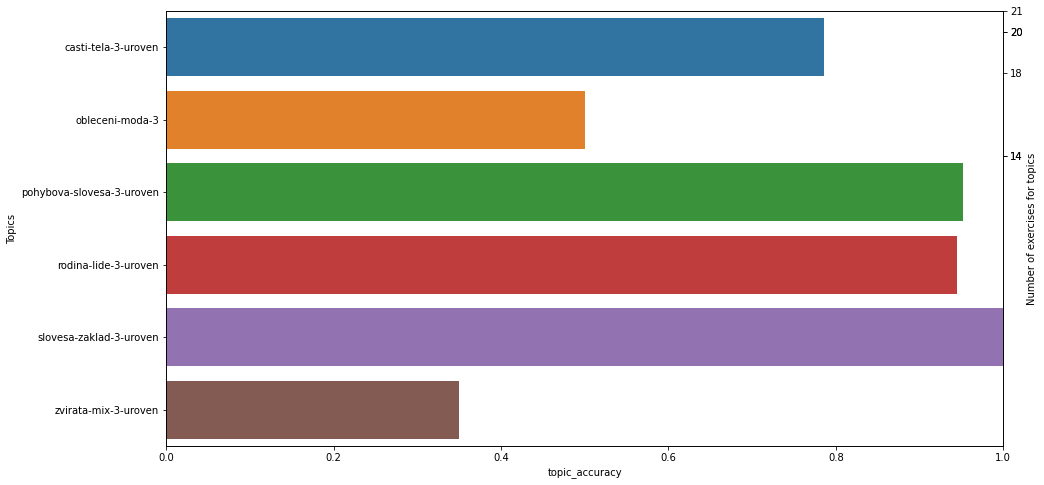

TOP3: slovesa-zaklad-3-uroven,pohybova-slovesa-3-uroven,rodina-lide-3-uroven


WORST3: zvirata-mix-3-uroven,obleceni-moda-3,casti-tela-3-uroven


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
19,1.0,rodina-lide-3-uroven,"[My _ will prepare breakfast., I have a large _ ., Tom is our _ ., You're a kind _ ., Mary is a very busy _ .]","[sister, family, guest, person, woman]","[sister, family, guest, person, woman]"
20,1.0,rodina-lide-3-uroven,"[Are you _ ?, Mary comes from a good _ ., Do you remember your _ ?, How is your _ pronounced?]","[married, family, grandfather, surname]","[married, family, grandfather, surname]"
25,1.0,slovesa-zaklad-3-uroven,"[I want to _ a song., You should _ him., My son still cannot _ ., I'll never _ you.]","[sing, thank, count, forget]","[sing, thank, count, forget]"
35,1.0,pohybova-slovesa-3-uroven,"[Go ahead and _ the ball. , We can _ around to feel warm., If you know the answer, _ your hand., You should _ up the trash., Do you want to _ to the music with him?]","[kick, move, raise, pick, dance]","[kick, move, raise, pick, dance]"
39,1.0,slovesa-zaklad-3-uroven,"[Does she _ singing?, I _ my keys a lot., Do you _ around here?, They _ the way to the city., He can _ to five now.]","[enjoy, forget, live, know, count]","[enjoy, forget, live, know, count]"


,problem_accuracy,fullname,sentence,solutions,pred
problem,,,,,
290,0.00,zvirata-mix-3-uroven,"[The _ can run very fast., The _ has a big furry tail., The _ looks like a lizard., The _ is a wild pig living in the forest.]","[hare, fox, salamander, boar]","[boar, salamander, fox, hare]"
470,0.00,zvirata-mix-3-uroven,"[We will walk along the river and we will feed _ ., An interesting fact about _ is that they have stable personality types., Pandas are mammals similar to _ that lives in forests in China., We often draw _ with apples on their back.]","[ducks, chimpanzees, bears, hedgehogs]","[bears, hedgehogs, chimpanzees, ducks]"
287,0.25,zvirata-mix-3-uroven,"[The _ lives in a pack., The _ hunts mice., The cow gave birth to a _ ., The _ is a big wild cat living in the forest.]","[wolf, weasel, calf, lynx]","[lynx, wolf, calf, weasel]"
376,0.25,pohybova-slovesa-3-uroven,"[Grab the rope and _ down., Does your head _ ?, Do you want to _ somewhere?, My legs hurt. I don’t want to _ .]","[swing, spin, sit, run]","[sit, spin, run, swing]"
411,0.25,rodina-lide-3-uroven,"[My uncle's daughter is my _ ., My husband's mother is my _ ., She said yes! So, she is my _ now., I don't have enough money to pay for the room on my own. I need to find a _ .]","[cousin, mother-in-law, fiancée, roommate]","[cousin, roommate, mother-in-law, fiancée]"


In [ ]:
visualize(roberta, level=3)